In [2]:
import numpy as np
import pandas as pd
import os
import mlcrate as mlc
import gc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pal = sns.color_palette()



In [12]:
pal

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [4]:
import subprocess

In [8]:
df_train = pd.read_csv('train.csv' , nrows=1000000)
df_test = pd.read_csv('test.csv' , nrows=1000000)

In [9]:
df_train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [11]:
df_train.ip.unique()

array([83230, 17357, 35810, ..., 42608, 90672, 84448], dtype=int64)

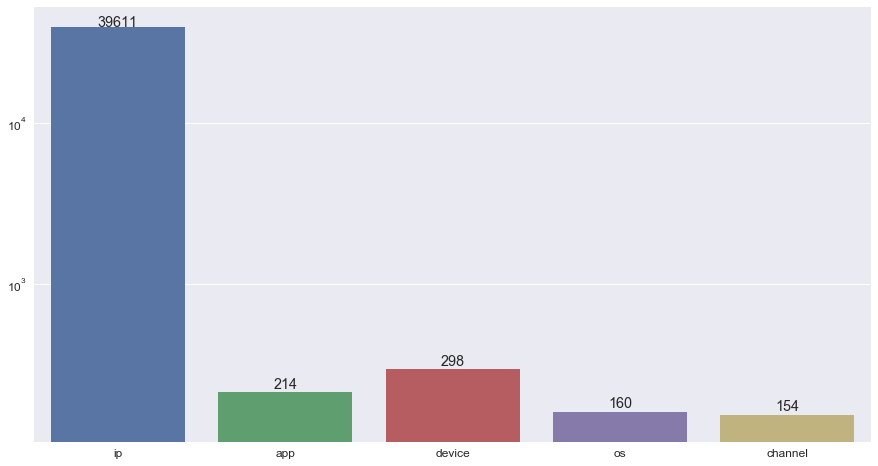

In [15]:
plt.figure(figsize=(15 , 8))
cols = ['ip' , 'app' , 'device','os' , 'channel']

uniques = [len(df_train[col].unique()) for col in cols]
sns.set(font_scale=1.2)

ax = sns.barplot(cols  , uniques , palette=pal , log=True)

for p , uniq in zip(ax.patches , uniques):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0 ,
           height+10.0,
           uniq,
           ha='center')

In [17]:
for col , uniq in zip(cols , uniques):
    print(col  , uniq)

ip 39611
app 214
device 298
os 160
channel 154


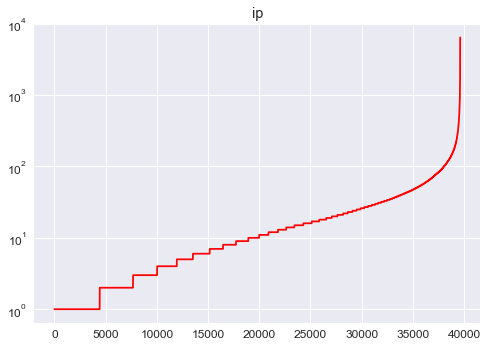

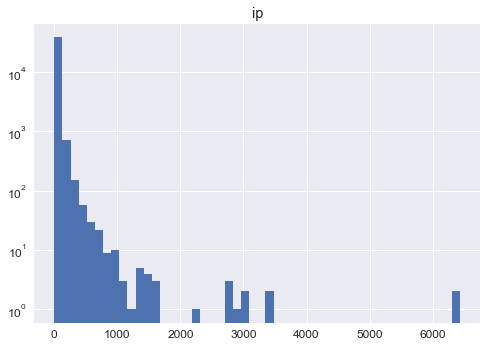

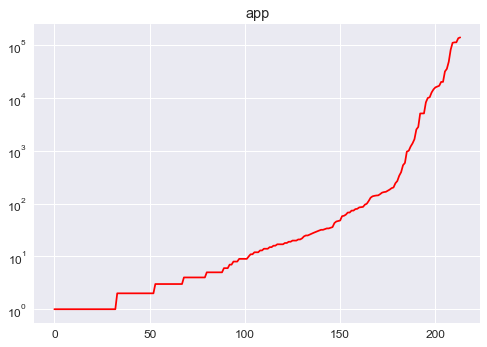

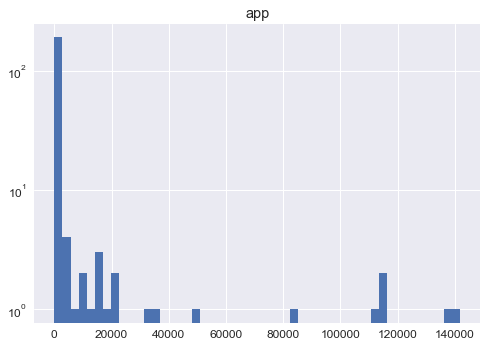

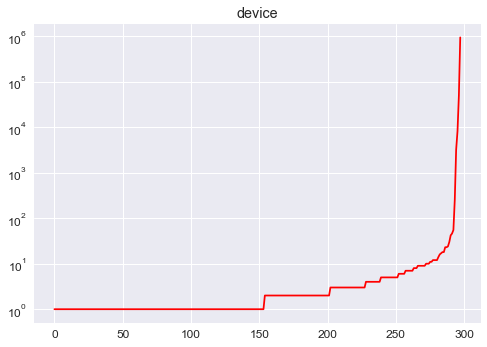

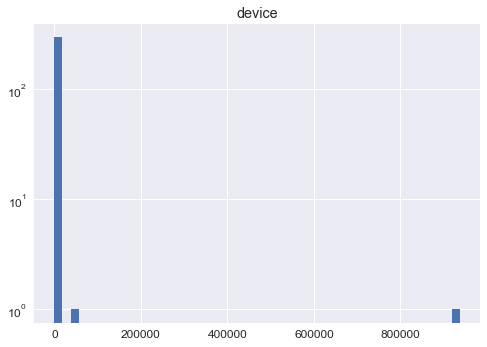

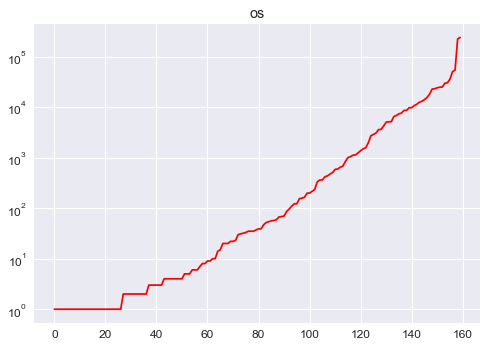

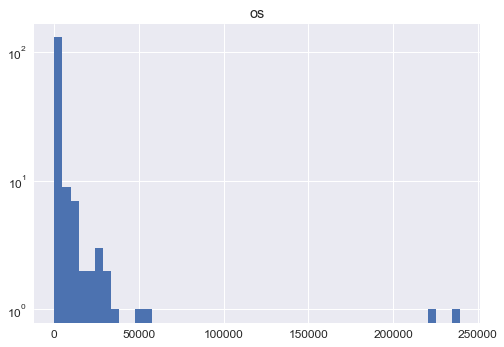

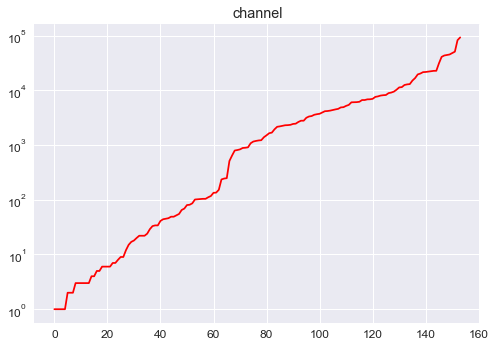

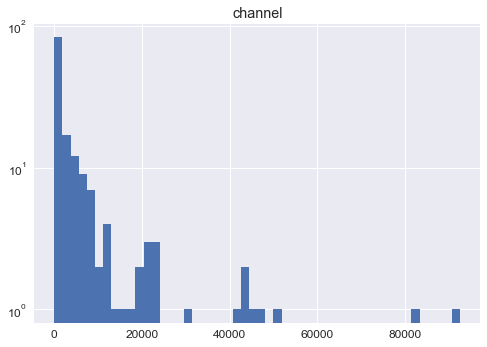

In [20]:
for col , uniq in zip(cols  , uniques):
    counts = df_train[col].value_counts()
    
    sorted_counts = np.sort(counts.values)
    
    fig = plt.figure()
    
    ax = fig.add_subplot(1,1,1)
    
    line , = ax.plot(sorted_counts , color='red')
    
    ax.set_yscale('log')
    plt.title(col)
    plt.show()
    #==========
    fig = plt.figure()
    
    ax = fig.add_subplot(1,1,1)
    plt.hist(sorted_counts , bins=50)
    ax.set_yscale('log' , nonposy='clip')
    plt.title(col)
    plt.show()

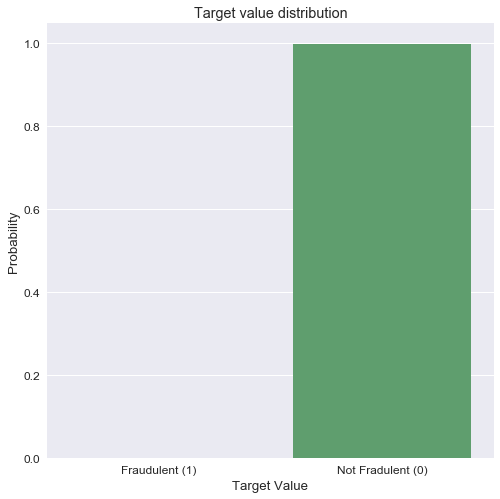

In [21]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
mean = (df_train.is_attributed.values == 1).mean()
ax = sns.barplot(['Fraudulent (1)', 'Not Fradulent (0)'], [mean, 1-mean], palette=pal)
ax.set(xlabel='Target Value', ylabel='Probability', title='Target value distribution')